In [1]:
#鐵達尼號生存預測

#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

C:\Users\Jia Ling\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#觀察資料
#讀檔
dataset=pd.read_csv('titanic.csv')
dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
dataset.shape

(891, 12)

In [4]:
#觀察資料集資訊
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#可視化資料
#設定seaborn為預設繪圖library
sns.set()

In [6]:
#設定繪圖函式
#以survived、dead為橫軸 (x軸)
#繪製其他feature相對於survived、dead的關係
def bar_chart(feature):
    survived=dataset[dataset['Survived']==1][feature].value_counts()
    dead=dataset[dataset['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

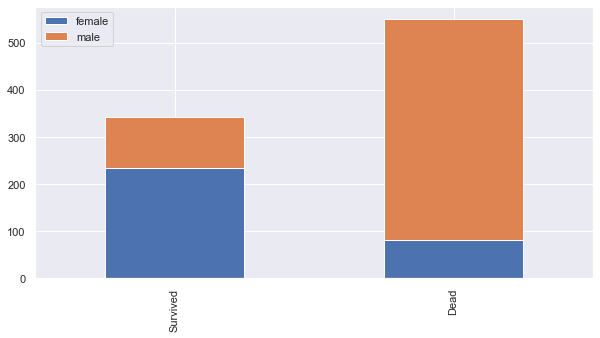

In [7]:
#生存/死亡的男女長條圖
bar_chart('Sex')

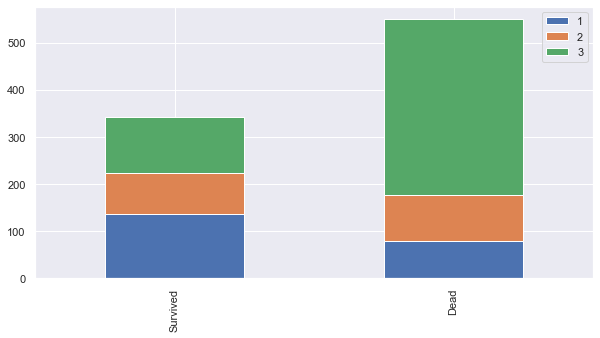

In [8]:
#生存/死亡的艙等長條圖
bar_chart('Pclass')

In [9]:
#觀察資料中有幾個nan值
dataset.isna().sum()
# dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#觀察Name欄位
dataset.Name
#發現隱含許多額外資料(Mr.、Mrs.、Dr、Miss...)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
#將符合A-Za-z+.的稱謂的詞挑出
#用正則從字符數據中抽取匹配的數據
'''
expand(默認為True)
為True，則返回只有一列的DataFrame
為False，則返回Series/Index
'''
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#統計各稱謂人數
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Capt          1
Jonkheer      1
Lady          1
Sir           1
Mme           1
Ms            1
Countess      1
Name: Title, dtype: int64

In [12]:
'''
map()會根據提供的函數對指定序列做映射
'''
#將人數較多的稱謂依序編號， Mr編號為0，Miss編號為1，Mrs編號為2，其他編號為3
title_mapping={'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'Mlle':3,'Major':3,'Col':3,'Lady':3,'Sir':3,'Countess':3,'Mme':3,'Ms':3,'Don':3,'Jonkheer':3,'Capt':3}
dataset['Title']=dataset['Title'].map(title_mapping)

In [13]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


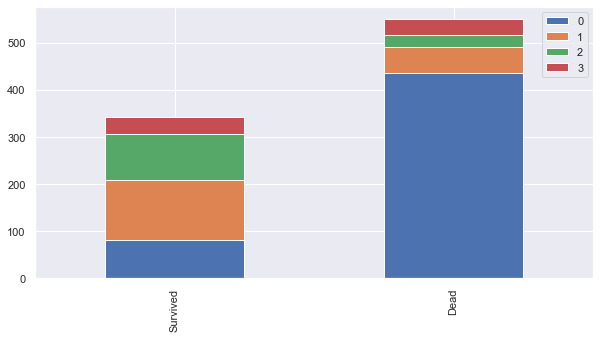

In [14]:
#顯示mapping後的結果
bar_chart('Title')

In [15]:
#Name的稱謂已轉換成新的class，且Name與生存/死亡無關，所以刪除該欄位
'''
drop()
axis=1，從列刪除標籤
inplace=True，直接在原數據上進行刪除操作，刪除後無法返回
inplace=False，不改變原數據，而是返回執行刪除操作後的新dataframe
'''

dataset.drop('Name',axis=1,inplace=True)

In [16]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [17]:
#Sex是文字，需進行處理
#將男性編號為0，女性編號為1
sex_mapping={'male':0,'female':1}
dataset['Sex']=dataset['Sex'].map(sex_mapping)

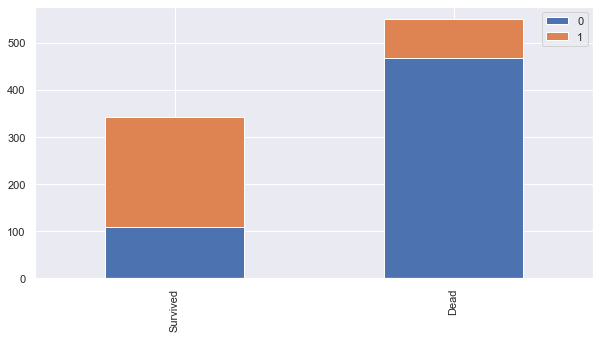

In [18]:
#顯示mapping後的結果
bar_chart('Sex')

In [19]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
#Age有空值，需填補
#考慮到年齡與Mr.、Mrs.、Miss可能有關，因此利用Title變成一組，填補年齡的中位數
dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'),inplace=True)
dataset['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

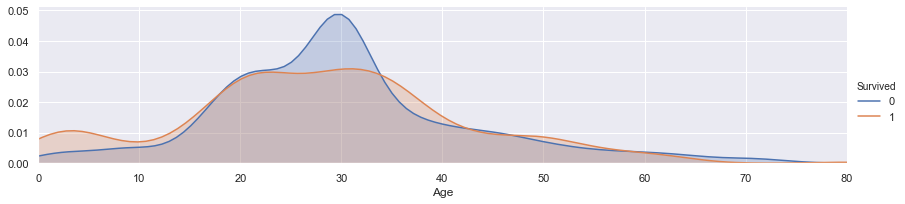

In [21]:
#顯示各年齡生存/死亡分布圖
facet=sns.FacetGrid(dataset,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,dataset['Age'].max()))
facet.add_legend()

plt.show()

In [22]:
#因年齡範圍太大，所以改用年齡區間去mapping
dataset.loc[dataset['Age']<=16,'Age']=0
dataset.loc[(dataset['Age']>16)&(dataset['Age']<=26),'Age']=1
dataset.loc[(dataset['Age']>26)&(dataset['Age']<=36),'Age']=2
dataset.loc[(dataset['Age']>36)&(dataset['Age']<=62),'Age']=3
dataset.loc[dataset['Age']>62,'Age']=4

In [23]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


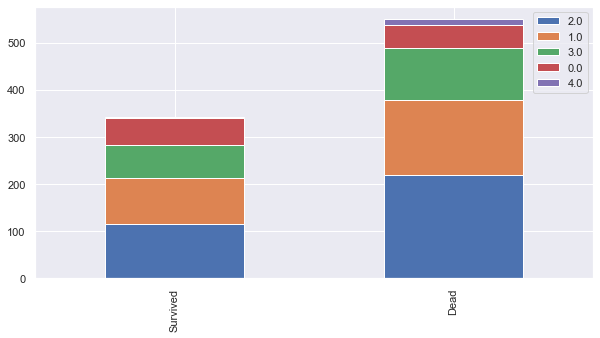

In [24]:
#顯示mapping後的結果
bar_chart('Age')

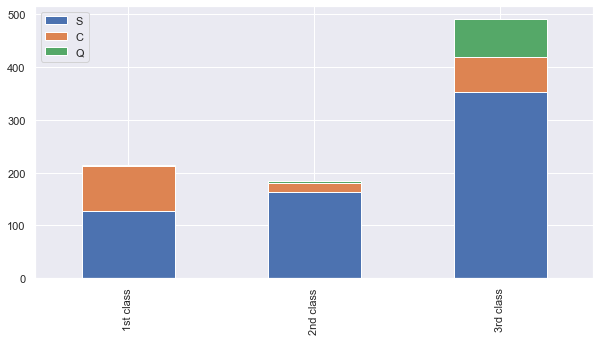

In [25]:
#分析各票種登船地點人數
Pclass1=dataset[dataset['Pclass']==1]['Embarked'].value_counts()
Pclass2=dataset[dataset['Pclass']==2]['Embarked'].value_counts()
Pclass3=dataset[dataset['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [26]:
#補登船地點缺失資料
#因每個艙等一半以上都是從"s"登船，所以缺失資料以"s"補上
dataset['Embarked']=dataset['Embarked'].fillna('S')
dataset.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


In [27]:
#Embarked是文字，需進行處理
#將S編號為0，C編號為1，Q編號為2
embarked_mapping={'S':0,'C':1,'Q':2}
dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)
dataset.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [28]:
#考慮到票價與艙等有關，因此利用艙等變成一組，填補票價的中位數
dataset['Fare'].fillna(dataset.groupby('Pclass')['Fare'].transform('median'),inplace=True)
dataset.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


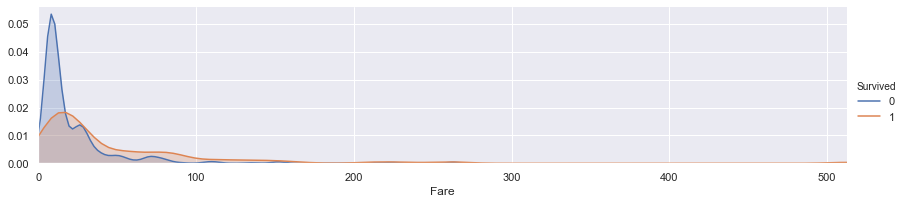

In [29]:
#顯示個票價生存/死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
 
plt.show()

In [30]:
#因票價範圍太大，所以改用票價區間去mapping
dataset.loc[dataset['Fare']<=17,'Fare']=0
dataset.loc[(dataset['Fare']>17)&(dataset['Fare']<=30),'Fare']=1
dataset.loc[(dataset['Fare']>30)&(dataset['Fare']<=100),'Fare']=2
dataset.loc[dataset['Fare']>100,'Fare']=3

In [31]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [32]:
#觀察船艙編號資料
dataset['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
B38            1
C30            1
D10 D12        1
A34            1
C86            1
Name: Cabin, Length: 147, dtype: int64

In [33]:
#取船艙編號第一個字母
dataset['Cabin']=dataset['Cabin'].str[:1]
dataset['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

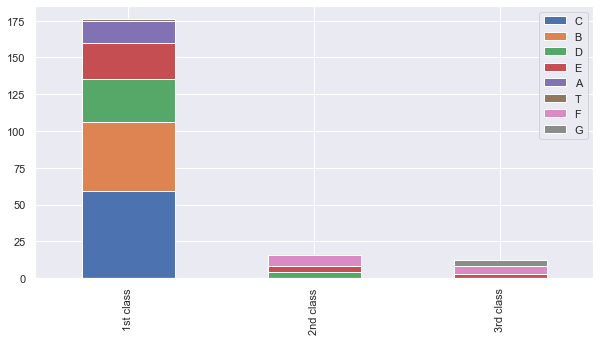

In [34]:
#分析船艙編號種類與票種之人數
#船艙編號與票種有關
Pclass1=dataset[dataset['Pclass']==1]['Cabin'].value_counts()
Pclass2=dataset[dataset['Pclass']==2]['Cabin'].value_counts()
Pclass3=dataset[dataset['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [35]:
#針對船艙種類進行補值
#先mapping
#依據船艙編號第一個字母依序編號
cabin_mapping={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [36]:
#使用票種分群，再取船艙編號中位數補值
dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [37]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


In [38]:
#將兄弟姊妹/配偶、父母/小孩、自己合併成一個欄位為家族人口
dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1

(0.0, 11.0)

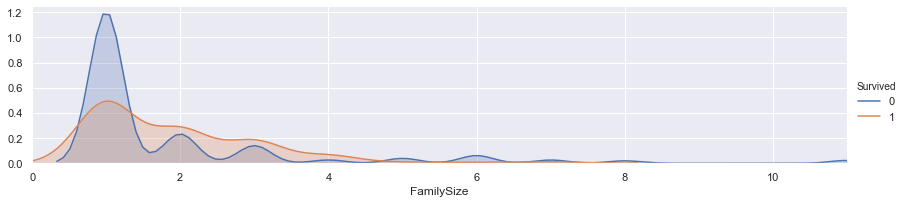

In [39]:
#顯示家族人口生存/死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [40]:
#針對家族人口進行mapping
family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)

In [41]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [42]:
#資料清洗
#將與生存死亡無關之欄位刪除
features_drop = ['Ticket', 'SibSp', 'Parch','PassengerId']
dataset = dataset.drop(features_drop, axis=1)

#設定預測目標變數與解釋函數
#目標變數:survived，其餘欄位為解釋變數
#將欄位分開儲存
dataset_data = dataset.drop('Survived', axis=1)
dataset_target = dataset['Survived']

dataset_data.shape, dataset_target.shape

((891, 8), (891,))

In [43]:
#所有的解釋變數
dataset_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [44]:
#確認欄位的資料型態皆為數值型別
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [45]:
#開始建置模型
#載入keras套件/數據預處理
from keras.models import Sequential
from keras.layers.core import Dense,Activation 
from keras.optimizers import Adam
from sklearn import preprocessing

Using TensorFlow backend.


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 40)                360       
_________________________________________________________________
activation_41 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               4100      
_________________________________________________________________
activation_42 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_43 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)               

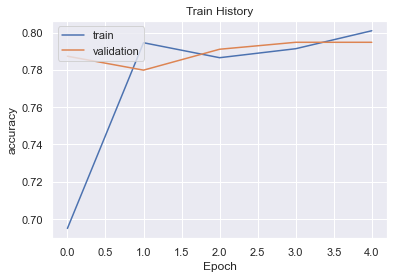

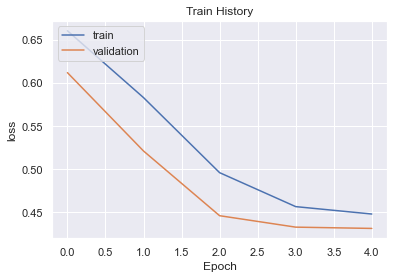

In [110]:
def build_model():
        #建立模型
        model = Sequential()
        #將模型疊起
        model.add(Dense(input_dim=8,units=40))
        model.add(Activation('relu'))
        model.add(Dense(units=100))
        model.add(Activation('relu'))
        model.add(Dense(units=10))
        model.add(Activation('relu'))
        #返回存活機率，>0.5表示生存，<0.5表示死亡
        model.add(Dense(units=1))
        model.add(Activation('sigmoid'))
        model.summary()
        return model

#建置繪圖函式
def show_train_history(train_history,train,validation,label):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(label)
    plt.xlabel('Epoch')#不同回合的變化
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

#feature標準化，介於0~1之間
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures=minmax_scale.fit_transform(dataset_data)


model = build_model()
#開始訓練模型
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['acc'])
train_history = model.fit(scaledFeatures, dataset_target,validation_split=0.3,batch_size=25,epochs=5)

#顯示訓練結果
score = model.evaluate(x=dataset_data, y=dataset_target)
print ('\nTrain Acc:', score[1])


#顯示訓練結果
show_train_history(train_history,'acc','val_acc','accuracy')
show_train_history(train_history,'loss','val_loss','loss')

In [111]:
#使用模型進行預測 Jack和 Rose是否生存
testset=pd.read_csv('test-rosejack.csv')
testset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Jack, Mr.",male,23.0,0,0,A/5 21171,5.0,F87,S
1,2,1,"Rose, Miss.",female,20.0,0,1,PC 17599,100.0,C85,S


In [112]:
#觀察測試資料資訊
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  2 non-null      int64  
 1   Pclass       2 non-null      int64  
 2   Name         2 non-null      object 
 3   Sex          2 non-null      object 
 4   Age          2 non-null      float64
 5   SibSp        2 non-null      int64  
 6   Parch        2 non-null      int64  
 7   Ticket       2 non-null      object 
 8   Fare         2 non-null      float64
 9   Cabin        2 non-null      object 
 10  Embarked     2 non-null      object 
dtypes: float64(2), int64(4), object(5)
memory usage: 304.0+ bytes


In [113]:
testset.shape

(2, 11)

In [114]:
#檢視測試資料中有幾個nan值
testset.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [115]:
#測試資料前處理，和訓練資料一樣做欄位的轉換
#將符合A-Za-z+.的稱謂的詞挑出
#用正則從字符數據中抽取匹配的數據
testset['Title']=testset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [116]:
#統計各稱謂人數
testset['Title'].value_counts()

Mr      1
Miss    1
Name: Title, dtype: int64

In [117]:
#將稱謂依序編號， Mr編號為0，Miss編號為1
testtitle_mapping={'Mr':0,'Miss':1}
testset['Title']=testset['Title'].map(testtitle_mapping)

In [118]:
testset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Jack, Mr.",male,23.0,0,0,A/5 21171,5.0,F87,S,0
1,2,1,"Rose, Miss.",female,20.0,0,1,PC 17599,100.0,C85,S,1


In [119]:
#Name的稱謂已轉換成新的class，且Name與生存/死亡無關，刪除該欄位
testset.drop('Name',axis=1,inplace=True)

In [120]:
testset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,male,23.0,0,0,A/5 21171,5.0,F87,S,0
1,2,1,female,20.0,0,1,PC 17599,100.0,C85,S,1


In [121]:
#Sex是文字，需進行處理
#將男性編號為0，女性編號為1
testsex_mapping={'male':0,'female':1}
testset['Sex']=testset['Sex'].map(testsex_mapping)

In [122]:
testset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,0,23.0,0,0,A/5 21171,5.0,F87,S,0
1,2,1,1,20.0,0,1,PC 17599,100.0,C85,S,1


In [123]:
#用年齡區間去mapping
testset.loc[(testset['Age']>16)&(testset['Age']<=26),'Age']=1

In [124]:
testset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,0,1.0,0,0,A/5 21171,5.0,F87,S,0
1,2,1,1,1.0,0,1,PC 17599,100.0,C85,S,1


In [125]:
#Embarked是文字，需進行處理
#將S編號為0
testembarked_mapping={'S':0}
testset['Embarked']=testset['Embarked'].map(testembarked_mapping)
testset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,0,1.0,0,0,A/5 21171,5.0,F87,0,0
1,2,1,1,1.0,0,1,PC 17599,100.0,C85,0,1


In [126]:
#用票價區間去mapping
testset.loc[testset['Fare']<=17,'Fare']=0
testset.loc[(testset['Fare']>30)&(testset['Fare']<=100),'Fare']=2
testset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,0,1.0,0,0,A/5 21171,0.0,F87,0,0
1,2,1,1,1.0,0,1,PC 17599,2.0,C85,0,1


In [127]:
#取船艙編號第一個字母
testset['Cabin']=testset['Cabin'].str[:1]
testset['Cabin']

0    F
1    C
Name: Cabin, dtype: object

In [128]:
#依據船艙編號第一個字母去mapping
testcabin_mapping={'C':0.8,'F':2}
testset['Cabin']=testset['Cabin'].map(testcabin_mapping)

In [129]:
testset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,0,1.0,0,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1.0,0,1,PC 17599,2.0,0.8,0,1


In [130]:
#將兄弟姊妹/配偶、父母/小孩、自己合併成一個欄位為家族人口
testset['FamilySize']=testset['SibSp']+testset['Parch']+1

In [131]:
#針對家族人口進行mapping
testfamily_mapping={1:0,2:0.4}
testset['FamilySize']=testset['FamilySize'].map(testfamily_mapping)
testset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,0,1.0,0,0,A/5 21171,0.0,2.0,0,0,0.0
1,2,1,1,1.0,0,1,PC 17599,2.0,0.8,0,1,0.4


In [132]:
#資料清洗
#將與生存死亡無關之欄位刪除
testset=testset.drop(features_drop,axis=1)

In [133]:
testset.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.0
1,1,1,1.0,2.0,0.8,0,1,0.4


In [134]:
#觀察測試資料前處理後的資訊
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      2 non-null      int64  
 1   Sex         2 non-null      int64  
 2   Age         2 non-null      float64
 3   Fare        2 non-null      float64
 4   Cabin       2 non-null      float64
 5   Embarked    2 non-null      int64  
 6   Title       2 non-null      int64  
 7   FamilySize  2 non-null      float64
dtypes: float64(4), int64(4)
memory usage: 256.0 bytes


In [135]:
#使用模型預測
#直接預測出機率，再從機率判斷是否生還
probability=model.predict(testset)
probability

array([[0.00578646],
       [0.8310462 ]], dtype=float32)

In [136]:
#給測試資料集的正確答案
testset_target=[0,1]
testset_target=DataFrame(testset_target,columns=['Survived'])
testset,testset_target

(   Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
 0       3    0  1.0   0.0    2.0         0      0         0.0
 1       1    1  1.0   2.0    0.8         0      1         0.4,    Survived
 0         0
 1         1)

In [137]:
#使用模型評估預估的準確度
score=model.evaluate(x=testset,y=testset_target)
print('\nTest Acc:',score[1])

2/2 [==============================] - 0s 2ms/step

Test Acc: 1.0


In [138]:
#取 weights和 bias
W,b=model.layers[0].get_weights()
print('weights={},\n\nbiases={}'.format(W,b))

weights=[[-0.15628287 -0.04803352  0.36741567  0.07928308  0.21873248 -0.23753645
   0.18316123  0.22229123 -0.12988396  0.22436576 -0.00780763 -0.07240242
   0.29454312  0.24356978  0.17364483 -0.07389069 -0.00217733 -0.03865235
  -0.20573848  0.16866028 -0.10026604  0.02647692  0.00710094 -0.02382046
   0.1543     -0.04713242  0.23381078  0.11946014 -0.05803579 -0.00394521
   0.00210358 -0.27737272  0.08669571 -0.18453634 -0.15795594 -0.10071854
   0.24239835 -0.16028325  0.37437665  0.4053111 ]
 [ 0.12543122 -0.22363311  0.25113085  0.28025272  0.00621362  0.18322922
  -0.04803473 -0.27773884  0.18590768 -0.05777703  0.19166134  0.32849213
  -0.13368547  0.28301165 -0.01704967  0.02496612  0.09582885 -0.15895595
  -0.19505316 -0.07229525 -0.22872362  0.21631394 -0.03502363 -0.31707639
   0.24713062  0.33087823 -0.28743196 -0.14466584  0.1007961  -0.33909634
   0.42588347 -0.18947908 -0.27613136 -0.26333266 -0.33367664 -0.32664573
   0.4193492   0.0424364  -0.24315521 -0.25337023]
 [

In [139]:
#模型存檔
model.save('dnnfortitanic.h5')